Problem: Identify the optimum number of cashiers for the seamless operations of small grocery store. Customer comes to the cashier with an exponential arrival time of 1.5 minute. The customer tend to finish checking out with a mean of 7 minutes. How many cashiers are required with waiting time no less than 5 minutes and service time being exponential?

---



We will use queuecomputer library from R to solve the above problem

In [ ]:
!pip install rpy2==3.5.1

In [1]:
#importing the required libraries
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector
import rpy2.robjects as ro
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext rpy2.ipython

Installing queue computer

In [ ]:
%%R
install.packages("queuecomputer")

In [13]:
pandas2ri.activate()
importr("queuecomputer")

rpy2.robjects.packages.Package as a <module 'queuecomputer'>

In [14]:
# Defining the problem with variables
lambda_inter_arrival_time = 1.5
mu_service_time = 7
no_of_servers = range(1,9)

In [15]:
# Defining a function to calculate waiting time
def queue_sim(mean_inter_arrival, mean_service, servers):

  # Simulating arrival time and service time
  r_arr_time = FloatVector(np.random.exponential(mean_inter_arrival, 400).cumsum())
  r_serv_time = FloatVector(np.random.exponential(mean_service, 400))

  #Using R package to simulate queuing
  simulation = r["queue_step"](r_arr_time, r_serv_time, servers)
  return simulation

We'll test the above function with random servers

In [16]:
sim = queue_sim(lambda_inter_arrival_time, mu_service_time, 1)

In [17]:
df = ro.conversion.rpy2py(sim[2])
df.head()

,arrivals,service,departures,waiting,system_time,server
1,0.039157,4.077070,4.116227,0.000000,4.077070,1
2,0.231694,0.708332,4.824558,3.884533,4.592864,1
3,1.888560,5.694305,10.518863,2.935998,8.630303,1
4,1.905897,6.969442,17.488305,8.612966,15.582408,1
5,3.927885,1.445473,18.933778,13.560419,15.005892,1


In [18]:
df["waiting"].mean()

1110.6192923223236

We see that the waiting time is too high and we need to figure out the optimum number of cashiers for smooth operation of the store

In [24]:
def optimum_servers(mean_inter_arrival, mean_service, servers):
  waiting = []
  for server in servers:
    sim_waiting = []
    for i in range (1000):
      # Simulating arrival time and service time
      r_arr_time = FloatVector(np.random.exponential(mean_inter_arrival, 400).cumsum())
      r_serv_time = FloatVector(np.random.exponential(mean_service, 400))

      #Using R package to simulate queuing
      simulation = r["queue_step"](r_arr_time, r_serv_time, server)
      sim_waiting.append(ro.conversion.rpy2py(simulation[2][3]).mean())
    waiting.append( np.median(sim_waiting))
  return waiting

In [29]:
waiting = optimum_servers(lambda_inter_arrival_time, mu_service_time, no_of_servers)

In [30]:
list(zip(no_of_servers, waiting))

[(1, 1093.1143340102767),
 (2, 397.1910547389682),
 (3, 167.12721608419994),
 (4, 52.999986961135015),
 (5, 7.957706219373902),
 (6, 1.8082488712961862),
 (7, 0.5720109688796258),
 (8, 0.1806393764115387)]

From the above simulation we conclude that the optimum number of cashiers is either 5 or 6 depending upon the service rate required and the strategy employed by the stakeholders.

Plotting the waiting time and number of servers

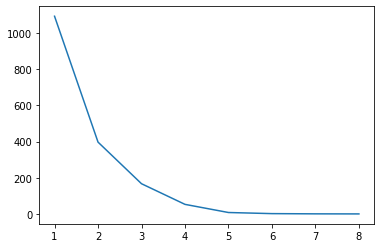

In [31]:
plt.plot(no_of_servers, waiting)